In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#reading the csv input data files
cust = pd.read_csv("D:/Pyhton/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/Customer.csv")
trx = pd.read_csv("D:/Pyhton/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/Transactions.csv")
prdct = pd.read_csv("D:/Pyhton/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv")

In [9]:
customer_final=pd.merge(pd.merge(cust,trx,left_on='customer_Id',right_on='cust_id'),prdct, left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code']) 

In [10]:
customer_final.info()
customer_final.head(10)
customer_final.tail(10)
customer_final.describe()
customer_final.customer_Id.value_counts()
customer_final.Gender.value_counts()
customer_final.city_code.value_counts()
customer_final.transaction_id.value_counts()
customer_final.prod_subcat_code.value_counts()
customer_final.prod_cat_code.value_counts()
customer_final.Store_type.value_counts()
customer_final.prod_cat.value_counts()
customer_final.prod_subcat.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
customer_Id          23053 non-null int64
DOB                  23053 non-null object
Gender               23044 non-null object
city_code            23045 non-null float64
transaction_id       23053 non-null int64
cust_id              23053 non-null int64
tran_date            23053 non-null object
prod_subcat_code     23053 non-null int64
prod_cat_code        23053 non-null int64
Qty                  23053 non-null int64
Rate                 23053 non-null int64
Tax                  23053 non-null float64
total_amt            23053 non-null float64
Store_type           23053 non-null object
prod_cat             23053 non-null object
prod_sub_cat_code    23053 non-null int64
prod_subcat          23053 non-null object
dtypes: float64(3), int64(8), object(6)
memory usage: 3.2+ MB


Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64

In [11]:
#converting the DOB object to datetime and calcualting age before generating the histogram
customer_final['DOB'] = pd.to_datetime(customer_final.DOB, format='%d-%m-%Y')
time_difference = (pd.Timestamp.now() - customer_final.DOB)
customer_final['Age'] = round(time_difference.apply(lambda x: x.days)/365.25)

In [12]:
#cleaning up multiple date formats and then converting to datetime
customer_final['tran_date'] =  pd.to_datetime(customer_final['tran_date'].str.replace('/','-'), format='%d-%m-%Y')

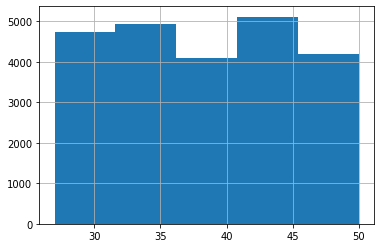

In [196]:
#generating histograms for continuous variables
customer_final.Age.hist(bins=5)

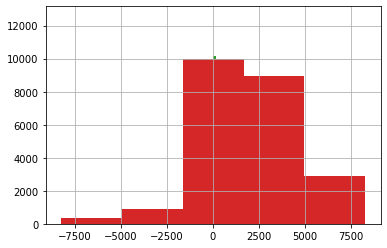

In [197]:
customer_final.Qty.hist(bins=5)
customer_final.Rate.hist(bins=5)
customer_final.Tax.hist(bins=5)
customer_final.total_amt.hist(bins=5)

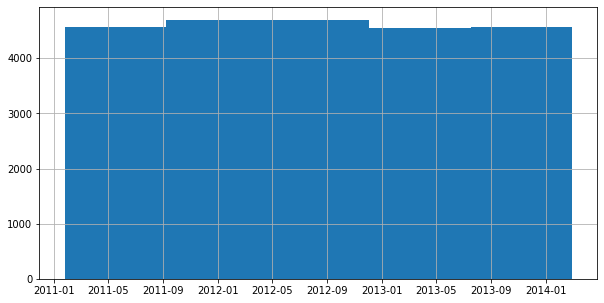

In [27]:
customer_final.tran_date.hist(bins=5,figsize = (10,5))

<function matplotlib.pyplot.show(*args, **kw)>

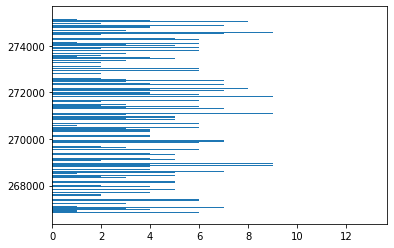

In [153]:
ser1=customer_final.groupby('customer_Id').customer_Id.count()
plt.barh(ser1.index,ser1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

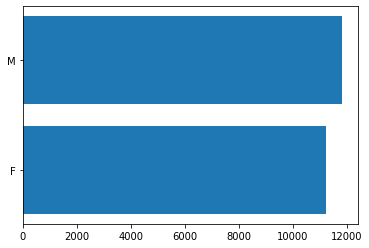

In [154]:
ser1=customer_final.groupby('Gender').customer_Id.count()
plt.barh(ser1.index,ser1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

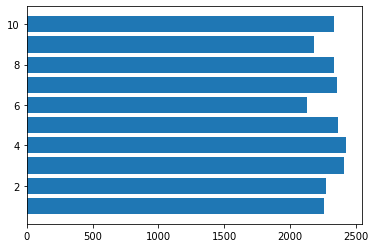

In [160]:
ser1=customer_final.groupby('city_code').customer_Id.count()
plt.barh(ser1.index,ser1)
plt.show

In [ ]:
ser1=customer_final.groupby('transaction_id').customer_Id.count()
plt.barh(ser1.index,ser1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

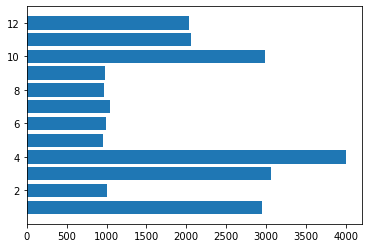

In [157]:
ser1=customer_final.groupby('prod_subcat_code').customer_Id.count()
plt.barh(ser1.index,ser1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

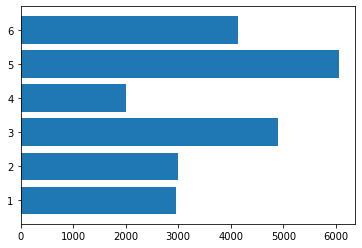

In [156]:
ser1=customer_final.groupby('prod_cat_code').customer_Id.count()
plt.barh(ser1.index,ser1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

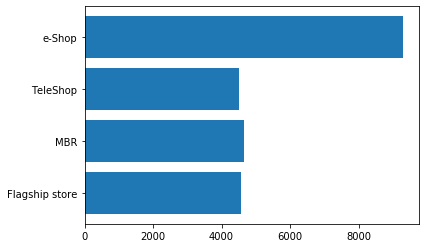

In [155]:
ser1=customer_final.groupby('Store_type').customer_Id.count()
plt.barh(ser1.index,ser1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

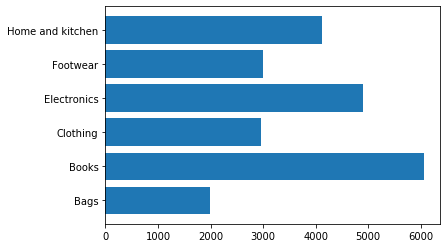

In [158]:
ser1=customer_final.groupby('prod_cat').customer_Id.count()
plt.barh(ser1.index,ser1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

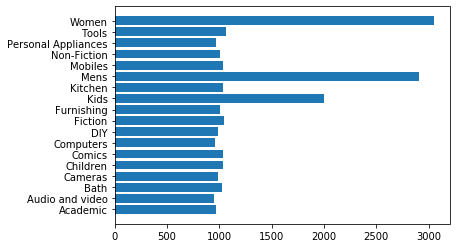

In [159]:
ser1=customer_final.groupby('prod_subcat').customer_Id.count()
plt.barh(ser1.index,ser1)
plt.show

In [51]:
print (round((customer_final['tran_date'].max() - customer_final['tran_date'].min()).days / 365 , 1), ' Years')

3.1  Years


In [52]:
customer_final.total_amt[customer_final.total_amt < 0].count()

2177

In [95]:
crossT=customer_final.groupby(['prod_cat','Gender']).customer_Id.count().reset_index()
final_set = crossT.pivot('prod_cat','Gender','customer_Id')
final_set[final_set.F > final_set.M]

Gender,F,M
prod_cat,,
Footwear,1529,1469


In [139]:
final_set = customer_final.groupby('city_code',as_index = False).customer_Id.count()
final_set['percentage'] = (final_set['customer_Id'] / final_set.customer_Id.sum()) * 100
final_set.loc[final_set['customer_Id'].idxmax()]

city_code         4.000000
customer_Id    2422.000000
percentage       10.509872
Name: 3, dtype: float64

In [155]:
final_set = customer_final.groupby('Store_type',as_index = False)[['Qty','total_amt']].sum()
final_set.loc[final_set['Qty'].idxmax()] 


Store_type         e-Shop
Qty                 22763
total_amt     1.98248e+07
Name: 3, dtype: object

In [156]:
final_set.loc[final_set['total_amt'].idxmax()] 

Store_type         e-Shop
Qty                 22763
total_amt     1.98248e+07
Name: 3, dtype: object

In [165]:
customer_final[(customer_final.Store_type == 'Flagship store') & ((customer_final.prod_cat == 'Electronics') | (customer_final.prod_cat == 'Clothing' ))].total_amt.sum()

3409559.27

In [166]:
customer_final[(customer_final.Gender == 'M') & (customer_final.prod_cat == 'Electronics')].total_amt.sum()

5703109.425

In [195]:
customer_new = customer_final[- customer_final.total_amt < 0 ].groupby('customer_Id',as_index = False).transaction_id.count()
customer_new[customer_new.transaction_id > 10].customer_Id.count()

6

In [201]:
customer_final[(customer_final.Age >= 25) & (customer_final.Age <= 35) & ((customer_final.prod_cat == 'Electronics') | (customer_final.prod_cat == 'Books'))].total_amt.sum()

8888102.86

In [202]:
customer_final[(customer_final.Age >= 25) & (customer_final.Age <= 35) & (customer_final.tran_date >= pd.Timestamp.strptime('01-01-2014','%d-%m-%Y')) & (customer_final.tran_date <= pd.Timestamp.strptime('01-03-2014','%d-%m-%Y'))].total_amt.sum()

909221.625